# Transcending Scales

In [1]:
from brian2 import *

## Single Neuron Transfer Property
### Single Neuron Current Injection

In [2]:
start_scope() #Ignore brian objects created prior to this command

# neuronal parameters
N = 1 # total number of neurons
vth = -55*mV# threshold potential
vr = -70*mV# reset potential
vl = -70*mV
tau = 10.0*ms # membrane time constant
Cm = 250*pF

#Equations are assigned as strings
eqs_neuron_LIFI='''
inp : amp
dv/dt = -(v-vl)/tau + inp/Cm : volt
'''

Ee = 0*mV
Ei = -85*mV
gl = 17*nS
Ge = 2*nS
Gi = -2*nS 
eqs_neuron_LIFC='''
inp : amp
dv/dt = (-gl*(v-vl) + Ge*ge*(Ee-vl) + Gi*gi*(Ei-vl) + inp)/Cm: volt
dge/dt = -ge*(1./tau) : 1
dgi/dt = -gi*(1./tau) : 1
'''

In [3]:
# Single Neuron
P=NeuronGroup(N=N,model=eqs_neuron_LIFI,threshold='v>=vth',reset='v=vr',refractory=2*ms,method='euler')

# Devices
sm = SpikeMonitor(P) # Record spike times
sr = PopulationRateMonitor(P) #Record rate of population activity
sm_vm = StateMonitor(P,'v',record=range(N)) # Record State Variables like Vm

store('initialized')

In [9]:
# Simulation
restore('initialized')

P.v = vl#initial value
P.inp = 0.1*namp #input

run(100*ms, report='text')

Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


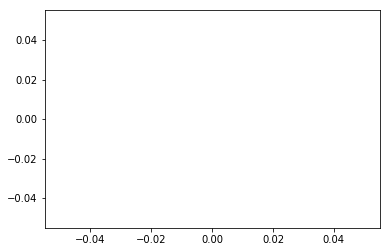

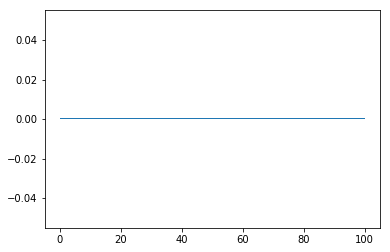

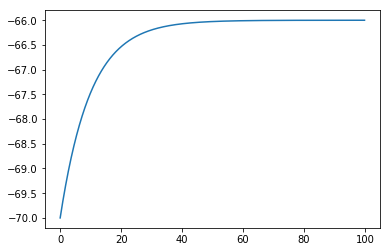

In [10]:
# Plot
figure()
plot(sm.t/ms,sm.i,',');
figure()
plot(sr.t/ms,sr.smooth_rate(width=5*ms)/Hz,',');
figure()
plot(sm_vm.t/ms,transpose(sm_vm.v/mV));